# SpreadsheetFormatter

In [1]:
using DataFramesMeta, CSV, Kroki
dir = pwd() * "/";

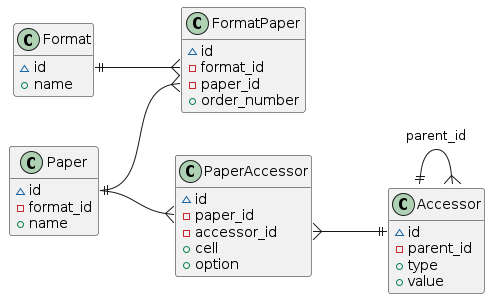

In [2]:
plantuml"""
class Format {
    ~ id
    + name
}
class Paper {
    ~ id
    - format_id
    + name
}
class FormatPaper {
    ~ id
    - format_id
    - paper_id
    + order_number
}
class Accessor {
    ~ id
    - parent_id
    + type
    + value
}
class PaperAccessor {
    ~ id
    - paper_id
    - accessor_id
    + cell
    + option
}
hide methods
left to right direction

Format::id ||--{ FormatPaper::format_id
Paper::id ||--{ FormatPaper::paper_id
Accessor ||--{ Accessor : parent_id
Paper::id ||--{ PaperAccessor::paper_id
PaperAccessor::accessor_id }--|| Accessor::id
"""

## Example

In [3]:
# papars
papers = CSV.read(dir * "papers.csv", DataFrame)

Row,id,format_id,name
,Int64,Int64,String7
1,1,1,Paper 1
2,2,1,Paper 2
3,3,1,Paper 3


In [4]:
# accessors
accessors = CSV.read(dir * "accessors.csv", DataFrame)

Row,id,parent_id,type,value
,Int64,Int64?,String15,String31
1,1,missing,string,company_name
2,2,missing,checkbox,is_xxx?
3,3,missing,autoshape_oval,yyy == ‘zzz’
4,4,missing,array,items
5,5,4,string,name
6,6,4,number,amount
7,7,4,number,price


In [5]:
# paper_accessors
paper_accessors = CSV.read(dir * "paper_accessors.csv", DataFrame)
paper_accessors |> display
@chain paper_accessors begin
    innerjoin(select(papers, :id, :name => :paper_name), on= :paper_id => :id)
    innerjoin(select(accessors, :id, :type, :value), on= :accessor_id => :id)
    select(:id, :paper_name, :cell, :type, :value, :option)
end

Row,id,paper_id,accessor_id,cell,option
,Int64,Int64,Int64,String3,String31?
1,1,1,1,B2,missing
2,2,1,2,D4,missing
3,3,1,3,E4,"{""width"":130,""height"":25}"
4,4,1,4,B7,missing
5,5,1,5,B7,missing
6,6,1,6,C7,missing
7,7,1,7,D7,missing


Row,id,paper_name,cell,type,value,option
,Int64,String7,String3,String15,String31,String31?
1,1,Paper 1,B2,string,company_name,missing
2,2,Paper 1,D4,checkbox,is_xxx?,missing
3,3,Paper 1,E4,autoshape_oval,yyy == ‘zzz’,"{""width"":130,""height"":25}"
4,4,Paper 1,B7,array,items,missing
5,5,Paper 1,B7,string,name,missing
6,6,Paper 1,C7,number,amount,missing
7,7,Paper 1,D7,number,price,missing
